# Что разрешает ЗБЧ

In [3]:
import numpy as np
import pandas as pd

from scipy import stats

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

plt.style.use('ggplot')

## 1. Сложные распределения

ЗБЧ разрешает нам решать реальные проблемы с помощью симуляций. Например, можно оценить математическое ожидание случайной величины $\frac{1}{X}$, где $X \sim N(5; 3)$ без взятия интегралов.

In [14]:
n_obs = 10**6

norm_rv = stats.norm(loc = 5, scale = 3)
x = norm_rv.rvs(n_obs)

np.mean(1/x)

0.45038986578473617

Если бы не было питона пришлось бы искать такой интеграл: 

$$
\mathbb{E} \left(\frac{1}{X} \right) = \int_{-\infty}^{+\infty} \frac{1}{x} \cdot \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - 5)^2}{2 \cdot 3^2}} dx.
$$

> __Важно:__ в видео мы с вами сказали, что для данного примера подход с симуляциями не работает. Интеграл расходится, так как этого математического ожидания не существует. При перезапуске симуляций мы каждый раз будем получать в качестве стреднего новые числа. Если мы попробуем нарисовать в динамике, к чему сходится выборочное среднее, мы увидим, что никакой сходимости тут нет. С делением случайных величин надо быть очень осторожным. 

-------------------------

__Другой пример.__ Также легко оценить многие вероятности. Например, оценим вероятность $P(X_1 + X_2 + X_3^2 > 5)$, где величины $X_i$ независимы и одинаково равномерно распределены $X_i \sim U[0;2]$:

In [18]:
n_obs = 10**6

# обратите внимание, что в этой функции задается левая граница и длина
# а не левая и правая границы
uniform_rv = stats.uniform(0, 2)

x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)

success = x_1 + x_2 + x_3**2 > 5

In [19]:
np.sum(success) / n_obs

0.147587

Здесь вектор success будет содержать значение `True` там, где условие `x_1 + x_2 + x_3**2 > 5` выполнено, и `False` там, где условие не выполнено. При сложении командой `np.sum()` каждое `True` будет посчитано как единица, а каждое `False` как ноль. Поэтому `np.sum(success)` даст количество раз, когда условие `x_1 + x_2 + x_3**2 > 5` выполнено.

__Как найти такую вероятность руками:__ 

- Первым шагом нам придётся найти распределение для $X_3^2$ 
- Втором шагом по формуле свёртки надо будет найти распределение суммы
- Третьим шагом можно посчитать вероятность

Почти на каждом шаге мы сталкиваемся с интегрированием. 

__Ещё пример.__ давайте найдём условную вероятность $P(X_1 + X_2 + X_3 > 0.8 \mid X_3 < 0.1)$. Снова используем для этого всю мощь `numpy` и сделаем срез по всем объектам, попавшим под условие.

In [21]:
n_obs = 10**6

uniform_rv = stats.uniform(0, 2)

x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)

uslovie = x_3 < 0.1

success = x_1[uslovie] + x_2[uslovie] + x_3[uslovie] > 0.8
np.sum(success) / np.sum(uslovie)

0.927986029805727

__Как найти такую вероятность руками:__ 

- Первым шагом по формуле свёртки надо будет найти распределение суммы
- Вторым шагом нам надо будет найти условную плотность 
- Третьим шагом можно посчитать вероятность

__Тем не менее это не говорит про ненужность аналитической работы.__ 

- Постоянно делать симуляции вместо того, чтобы один раз получить формулу и считать по ней - неэффективно 
- Часто возникают ситуации, когда за счёт генераций получить правильный ответ очень сложно. Например, куча проблем возникает для многомерных распределений.

> Подобные численные методы для оценки разных характеристик называются методами **Монте-Карло**.


## 2. Удав и багеты)

Удав Анатолий любит французские багеты. Длина французского багета равна $1$ метру. За один укус Удав Анатолий поедает кусок случайной длины, равномерно распределённый на отрезке $[0;1]$. Для того, чтобы съесть весь багет удаву потребуется случайное количество $N$ укусов. 

Найдём $\mathbb{E}(N)$ и $Var(N)$ с помощью симуляций.

In [28]:
# Багеты! Давайте начнём с одной итерации эксперемента
unif_rv = stats.uniform(0, 1)

l = 1 # длина багета
m = 0 # число укусов

while l > 0:
    l -= unif_rv.rvs(1)
    m+=1
    
print(m)

2


In [29]:
def eat_one_baguette():
    l = 1 # длина багета
    m = 0 # число укусов

    while l > 0:
        l -= unif_rv.rvs(1)
        m+=1
    
    return(m)

Теперь мы можем провести много итераций эксперемента

In [30]:
n_obs = 10**4
N = [eat_one_baguette() for _ in range(n_obs)]

In [32]:
np.mean(N)

2.7142

In [33]:
np.var(N)

0.76431836

Кстати говоря, в сборнике сложных задач по теории вероятностей, [культурном коде,](https://github.com/bdemeshev/probability_dna/raw/master/probability_dna.pdf) можно найти три разных решения этой задаи руками. Она там находится под номером $46$. Кроме неё там много других очень красивых задач. 

# 3. Парадокс дней рождений

__Парадокс дней рождений:__ в произвольной группе из $50$ человек вероятность того, что хотябы у двоих людей дни рождения совпадут, равна $0.97$. Но это в теории, при предпосылке, что люди равномерно рождаются в течение года. Давайте проверим это. 


В табличке `bdates.tsv` лежит информация о $1$ млн. пользователей из вконтакте. В табличке можно найти данные о имени пользователя `first_name`, его поле `sex`, городе проживания `city`, дне `bdate`, месяце `bmonth` и годе `byear` рождения.

In [36]:
df = pd.read_csv('vk_bdate.tsv', sep='\t',
                dtype={'byear':pd.Int64Dtype(),
                       'bmoth':pd.Int64Dtype(),
                       'bday':pd.Int64Dtype()
                })
df.head()

,city,first_name,id,sex,byear,bmonth,bday
0,Севастополь,Галина,268520763,1,1955,2.0,4
1,Новороссийск,Маша,386703913,1,2002,7.0,10
2,Нижний Новгород,Екатерина,250291860,1,<NA>,NaN,<NA>
3,Турсунзаде,Μαχμυδσθδ,384274806,2,<NA>,NaN,<NA>
4,NaN,Bekzod,366702299,2,<NA>,NaN,<NA>


In [37]:
df = df[~(df.bmonth.isnull() | df.bday.isnull())]
df.shape

(694755, 7)

Заведём колонку с днём и месяцем рождения человека

In [38]:
df['bdate'] = df['bday'].astype(str) + '-' + df['bmonth'].astype(str)

Построим гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?

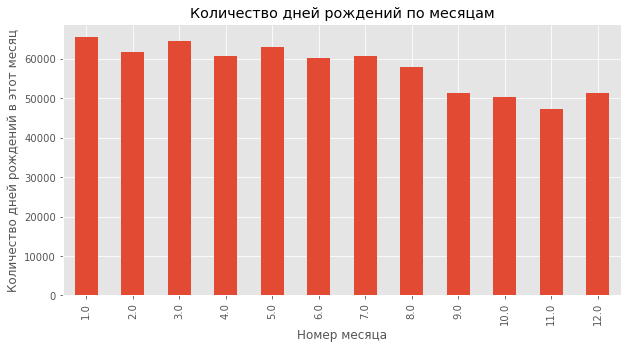

In [39]:
plt.figure(figsize=(10, 5))

df.bmonth.value_counts().sort_index().plot(kind='bar');

plt.title('Количество дней рождений по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Количество дней рождений в этот месяц');

Эмпирически оценим вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения.

In [40]:
df.sample(5) # выборка в 5 человек

,city,first_name,id,sex,byear,bmonth,bday,bdate
947571,Шира,Катарина,151015925,1,<NA>,12.0,17,17-12.0
222660,NaN,Павел,230310918,2,<NA>,10.0,8,8-10.0
407465,Воложин,Колян,136631164,2,1992,11.0,30,30-11.0
92173,Чернигов,Богдан,333586752,2,<NA>,3.0,7,7-3.0
162485,Нефтекамск,Рафаиль,233414325,2,<NA>,2.0,28,28-2.0


In [46]:
# Если уникальных дат меньше 50 => совпадение
df.bdate.sample(50).unique().size

45

Симулируем

In [47]:
n = 10**4
m = 0

for i in tqdm_notebook(range(n)):
    m += df.bdate.sample(50).unique().size < 50

C:\Users\misha\AppData\Local\Temp/ipykernel_9228/1170258278.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


  0%|          | 0/10000 [00:00<?, ?it/s]

In [48]:
m/n

0.977

С помощью симуляции мы доказали, что в произвольной группе из  50
  человек вероятность того, что хотябы у двоих людей дни рождения совпадут, равна  0.97